In [1]:
from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay

In [4]:
# integrating our preprocessing into a pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [19]:
corpus = pd.read_csv('data/spotify-reviews.csv')
spotify_df = pd.read_csv('data/preprocessed-reviews.csv')
spotify_df = spotify_df.drop(columns=['process_tok'])
data = pd.concat([spotify_df,corpus],axis=1)

In [21]:
spotify_reviews = data[data.sentiment.isin(['pos','neg'])]
spotify_reviews.process_tok

0        great music service audio high quality app eas...
1        please ignore previous negative rating app sup...
2        get best spotify experience android annoy plea...
3                       really buggy terrible use recently
4          dear spotify get song put playlist shuffle play
                               ...                        
61589    even communicate lyric feature available user ...
61590    use sooo good back download free version pick ...
61591    app good take device start comp spotify start ...
61592    app good hard navigate let play song click pla...
61593    good sometimes doesnt load music play second s...
Name: process_tok, Length: 56581, dtype: object

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [27]:
label_enc = LabelEncoder()

In [30]:
X = spotify_reviews.process_tok
y = spotify_reviews.sentiment
y = label_enc.fit_transform(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [37]:
pre_process_steps = [('tfdif', TfidfVectorizer())]
preprocess_pipeline = Pipeline(pre_process_steps)
preprocess_pipeline

Pipeline(steps=[('tfdif', TfidfVectorizer())])

In [38]:
X_train_processed = preprocess_pipeline.fit_transform(X_train)

In [39]:
from sklearn.dummy import DummyClassifier

In [40]:
dummy_clf = DummyClassifier(random_state=42)

In [41]:
dummy_clf.fit(X_train_processed,y_train)

DummyClassifier(random_state=42)

In [43]:
preds = dummy_clf.predict(X_test)

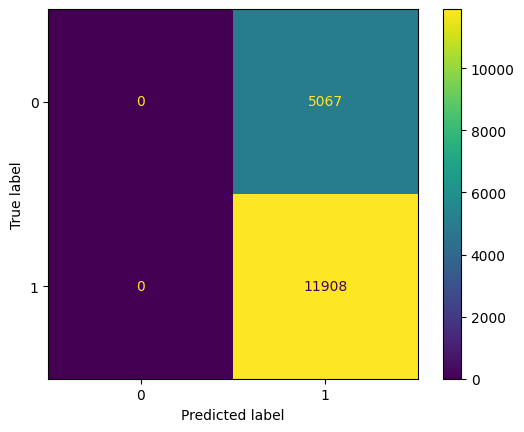

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test,preds)

In [47]:
dummy_clf.score(X_test,y_test)

0.7015022091310751

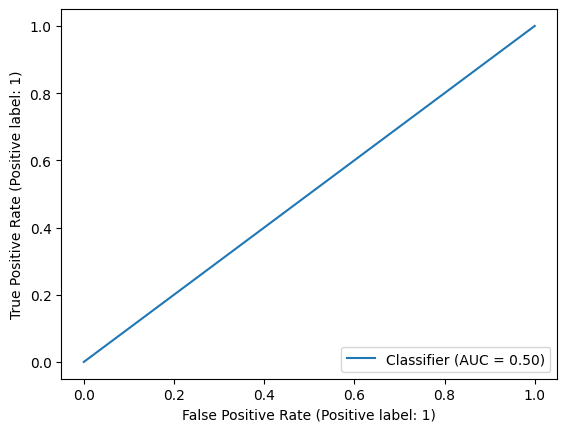

In [71]:
RocCurveDisplay.from_predictions(y_test, preds)

### RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf_clf = RandomForestClassifier()

In [50]:
rf_clf.fit(X_train_processed,y_train)

RandomForestClassifier()

In [52]:
X_test_processed = preprocess_pipeline.transform(X_test)

In [54]:
preds2 = rf_clf.predict(X_test_processed)

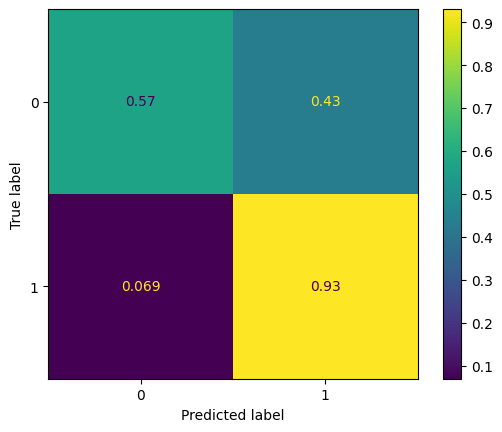

In [70]:
ConfusionMatrixDisplay.from_predictions(y_test, preds2,normalize='true')

In [58]:
rf_clf.score(X_test_processed,y_test)

0.82279823269514

In [60]:
print(classification_report(y_test,preds2))

              precision    recall  f1-score   support

           0       0.78      0.57      0.66      5067
           1       0.84      0.93      0.88     11908

    accuracy                           0.82     16975
   macro avg       0.81      0.75      0.77     16975
weighted avg       0.82      0.82      0.81     16975



In [64]:
spotify_reviews.sentiment.value_counts()

pos    39589
neg    16992
Name: sentiment, dtype: int64

In [67]:
np.unique(y, return_counts=True)
# 0 = negative review 
# 1 = positive review

(array([0, 1]), array([16992, 39589], dtype=int64))

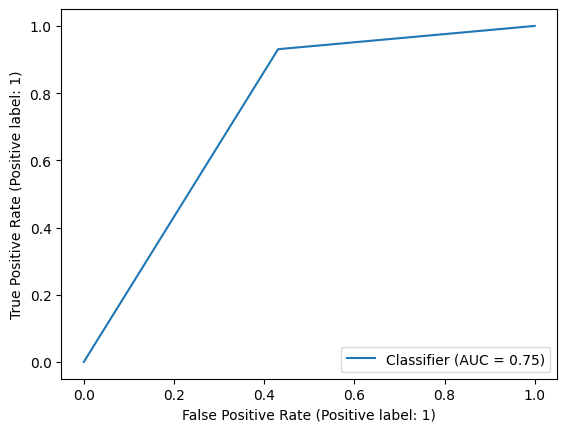

In [68]:
RocCurveDisplay.from_predictions(y_test,preds2)